In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [66]:
meat_prices = pd.read_csv("mla_consumer_meat_prices.csv")
meat_prices

,Quarterly,Category,Average Value,Units
0,31/03/2000 0:00,Beef,1047.104943,AUD c/kg
1,31/03/2000 0:00,Chicken,486.437172,AUD c/kg
2,31/03/2000 0:00,Lamb,667.593124,AUD c/kg
3,31/03/2000 0:00,Pork,764.927076,AUD c/kg
4,30/06/2000 0:00,Beef,1072.924397,AUD c/kg
...,...,...,...,...
367,31/12/2022 0:00,Pork,1375.016743,AUD c/kg
368,31/03/2023 0:00,Beef,2698.082454,AUD c/kg
369,31/03/2023 0:00,Chicken,631.807088,AUD c/kg
370,31/03/2023 0:00,Lamb,2064.750206,AUD c/kg


In [67]:
beef_prices = meat_prices.loc[meat_prices["Category"] == "Beef"]
beef_prices

,Quarterly,Category,Average Value,Units
0,31/03/2000 0:00,Beef,1047.104943,AUD c/kg
4,30/06/2000 0:00,Beef,1072.924397,AUD c/kg
8,30/09/2000 0:00,Beef,1055.871714,AUD c/kg
12,31/12/2000 0:00,Beef,1063.424743,AUD c/kg
16,31/03/2001 0:00,Beef,1113.760231,AUD c/kg
...,...,...,...,...
352,31/03/2022 0:00,Beef,2676.767440,AUD c/kg
356,30/06/2022 0:00,Beef,2706.211882,AUD c/kg
360,30/09/2022 0:00,Beef,2711.624305,AUD c/kg
364,31/12/2022 0:00,Beef,2703.489433,AUD c/kg


In [68]:
beef_prices_yearly = beef_prices.copy()
beef_prices_yearly

,Quarterly,Category,Average Value,Units
0,31/03/2000 0:00,Beef,1047.104943,AUD c/kg
4,30/06/2000 0:00,Beef,1072.924397,AUD c/kg
8,30/09/2000 0:00,Beef,1055.871714,AUD c/kg
12,31/12/2000 0:00,Beef,1063.424743,AUD c/kg
16,31/03/2001 0:00,Beef,1113.760231,AUD c/kg
...,...,...,...,...
352,31/03/2022 0:00,Beef,2676.767440,AUD c/kg
356,30/06/2022 0:00,Beef,2706.211882,AUD c/kg
360,30/09/2022 0:00,Beef,2711.624305,AUD c/kg
364,31/12/2022 0:00,Beef,2703.489433,AUD c/kg


In [69]:
beef_prices_yearly["Quarterly"] = beef_prices_yearly["Quarterly"].astype("datetime64[ns]")
beef_prices_yearly

,Quarterly,Category,Average Value,Units
0,2000-03-31,Beef,1047.104943,AUD c/kg
4,2000-06-30,Beef,1072.924397,AUD c/kg
8,2000-09-30,Beef,1055.871714,AUD c/kg
12,2000-12-31,Beef,1063.424743,AUD c/kg
16,2001-03-31,Beef,1113.760231,AUD c/kg
...,...,...,...,...
352,2022-03-31,Beef,2676.767440,AUD c/kg
356,2022-06-30,Beef,2706.211882,AUD c/kg
360,2022-09-30,Beef,2711.624305,AUD c/kg
364,2022-12-31,Beef,2703.489433,AUD c/kg


In [70]:
beef_prices_yearly['Year'] = beef_prices_yearly["Quarterly"].dt.strftime("%Y")
beef_prices_yearly

,Quarterly,Category,Average Value,Units,Year
0,2000-03-31,Beef,1047.104943,AUD c/kg,2000
4,2000-06-30,Beef,1072.924397,AUD c/kg,2000
8,2000-09-30,Beef,1055.871714,AUD c/kg,2000
12,2000-12-31,Beef,1063.424743,AUD c/kg,2000
16,2001-03-31,Beef,1113.760231,AUD c/kg,2001
...,...,...,...,...,...
352,2022-03-31,Beef,2676.767440,AUD c/kg,2022
356,2022-06-30,Beef,2706.211882,AUD c/kg,2022
360,2022-09-30,Beef,2711.624305,AUD c/kg,2022
364,2022-12-31,Beef,2703.489433,AUD c/kg,2022


In [71]:
beef_prices_yearly.drop(columns=["Quarterly"])

,Category,Average Value,Units,Year
0,Beef,1047.104943,AUD c/kg,2000
4,Beef,1072.924397,AUD c/kg,2000
8,Beef,1055.871714,AUD c/kg,2000
12,Beef,1063.424743,AUD c/kg,2000
16,Beef,1113.760231,AUD c/kg,2001
...,...,...,...,...
352,Beef,2676.767440,AUD c/kg,2022
356,Beef,2706.211882,AUD c/kg,2022
360,Beef,2711.624305,AUD c/kg,2022
364,Beef,2703.489433,AUD c/kg,2022


In [72]:
final_prices = beef_prices_yearly.groupby("Year").mean(numeric_only=True)
final_prices

,Average Value
Year,
2000,1059.831449
2001,1225.575984
2002,1320.058811
2003,1367.296939
2004,1399.280577
2005,1505.252976
2006,1550.712238
2007,1532.154747
2008,1578.180680


In [75]:
final_prices.reset_index(inplace=True)

In [76]:
final_prices.columns.to_list()

['Year', 'Average Value']

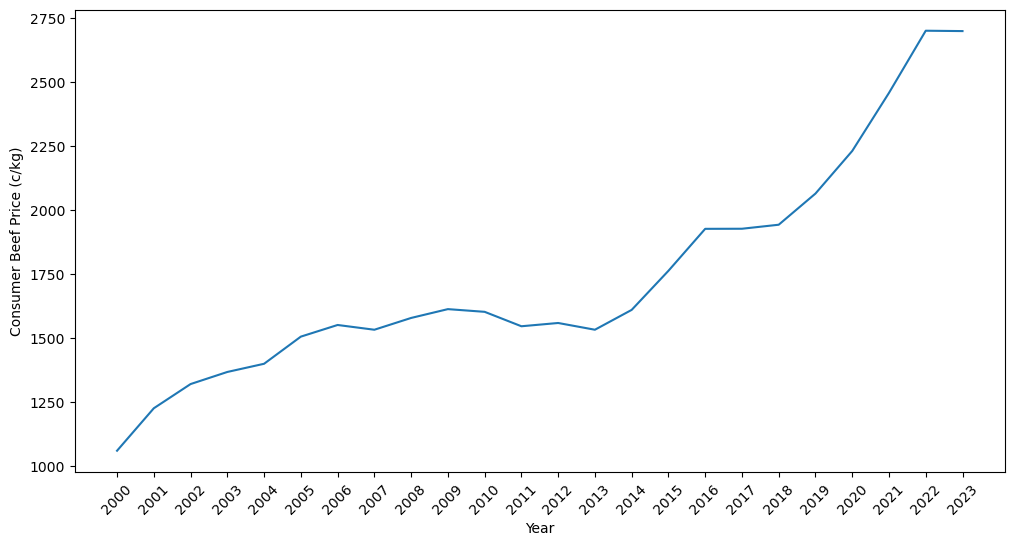

In [83]:
x_values = final_prices["Year"]
y_values = final_prices["Average Value"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Consumer Beef Price (c/kg)")
plt.savefig("AUS_consumer_beef_prices.png")
plt.show()